# 1. 메모리 변수 제거

In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 2. 사용 패키지

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rc('font', family = 'Malgun Gothic') # WINDOWS
plt.rc('font', family = 'AppleGothic') # MAC
plt.rc('axes', unicode_minus = False)
import warnings
warnings.filterwarnings('ignore')

# 3. 데이터 로드

In [3]:
train = pd.read_csv('data/train_pre.csv') # 전처리한 훈련 데이터

# 4. 통계분석

In [4]:
train.describe()

,년,월,일,요일,휴일전날,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,...,중식참여율,석식참여율,체감온도(중식),불쾌지수(중식),우산(중식),체감온도(석식),불쾌지수(석식),우산(석식),코로나신규확진자,거리두기단계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2018.052282,6.512033,15.947718,2.006639,0.039834,2807.815768,157.913693,241.142739,274.117012,43.506224,...,0.376458,0.195460,19.308465,61.745228,0.103734,19.308465,61.745228,0.103734,0.207469,0.228216
std,1.433958,3.453906,8.650452,1.415372,0.195650,171.264404,144.190572,43.532298,246.239651,109.937400,...,0.085110,0.058032,9.614234,12.077091,0.305042,9.614234,12.077091,0.305042,1.739738,0.501858
min,2016.000000,1.000000,1.000000,0.000000,0.000000,2601.000000,23.000000,41.000000,0.000000,0.000000,...,0.143649,0.000000,-6.600000,35.000000,0.000000,-6.600000,35.000000,0.000000,0.000000,0.000000
25%,2017.000000,4.000000,9.000000,1.000000,0.000000,2645.000000,71.000000,217.000000,4.000000,0.000000,...,0.317741,0.172010,11.100000,51.000000,0.000000,11.100000,51.000000,0.000000,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,2.000000,0.000000,2760.000000,105.000000,245.000000,299.000000,0.000000,...,0.371933,0.203690,19.900000,62.000000,0.000000,19.900000,62.000000,0.000000,0.000000,0.000000
75%,2019.000000,9.000000,23.000000,3.000000,0.000000,2962.000000,185.000000,272.000000,452.000000,0.000000,...,0.432010,0.230567,27.700000,72.000000,0.000000,27.700000,72.000000,0.000000,0.000000,0.000000
max,2021.000000,12.000000,31.000000,4.000000,1.000000,3305.000000,1224.000000,378.000000,1044.000000,533.000000,...,0.597203,0.380270,38.100000,84.000000,1.000000,38.100000,84.000000,1.000000,33.000000,2.500000


# 5. 상관계수
- -1.0 < r < -0.7 : 매우 강한 음의 상관관계
- -0.7 < r < -0.3 : 강한 음의 상관관계
- -0.3 < r < -0.1 : 약한 음의 상관관계
- -0.1 < r < 0.1 : 상관관계 없음
- 0.1 < r < 0.3 : 약한 양의 상관관계
- 0.3 < r < 0.7 : 강한 양의 상관관계
- 0.7 < r < 1.0 : 매우 강한 양의 상관관계

In [5]:
train.corr()[['중식참여율', '석식참여율']]

,중식참여율,석식참여율
년,-0.178877,-0.277690
월,-0.158003,-0.130436
일,-0.093265,-0.180888
요일,-0.685481,-0.251989
휴일전날,-0.102500,-0.150425
본사정원수,-0.271385,-0.295678
본사휴가자수,-0.245167,-0.204150
본사출장자수,-0.573241,-0.214768
본사시간외근무명령서승인건수,0.461910,0.498712
현본사소속재택근무자수,0.134819,-0.023177


<AxesSubplot:>

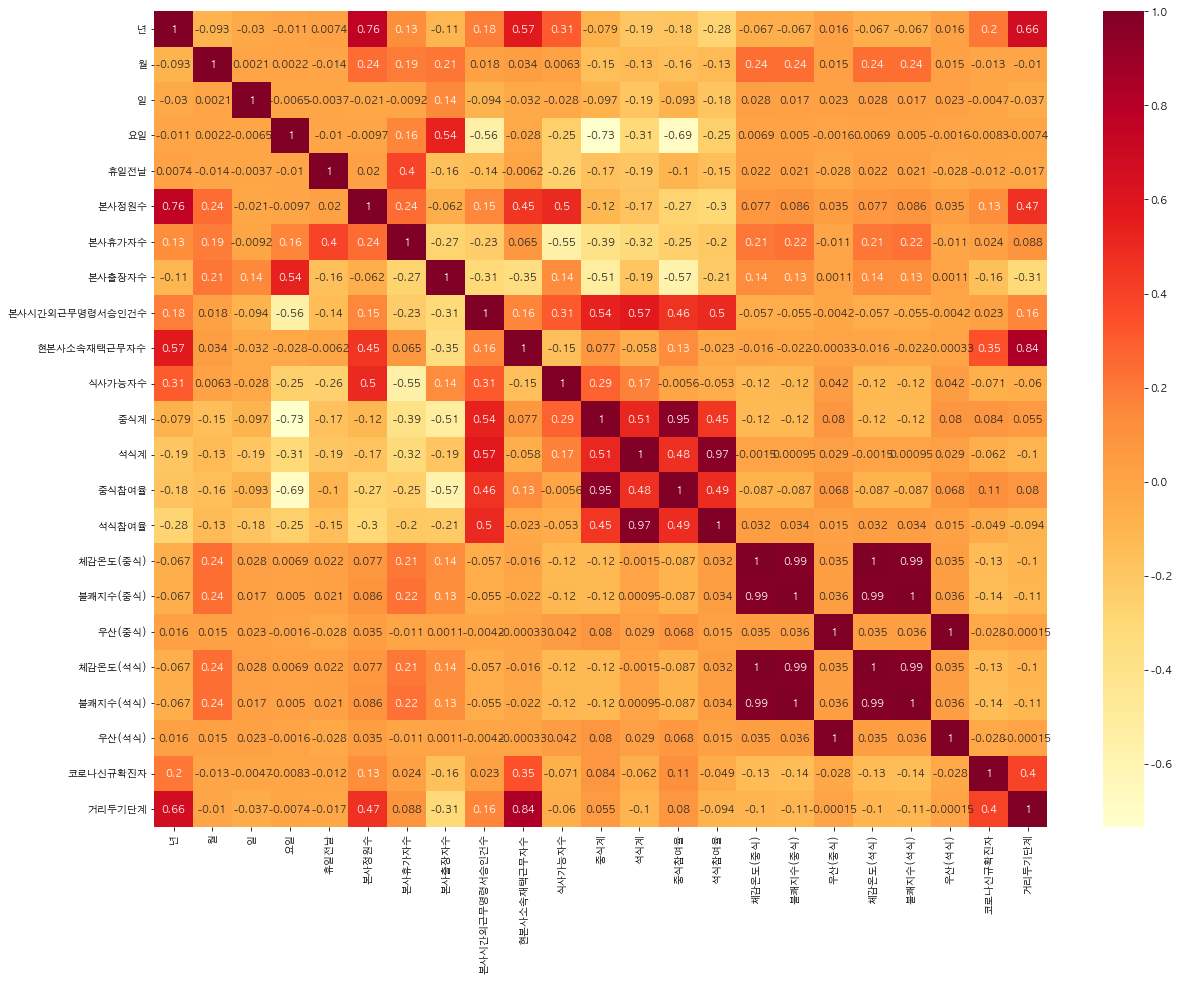

In [6]:
plt.figure(figsize = (20, 15))
sns.heatmap(train.corr(), annot = True, cmap = 'YlOrRd')

# 6. 상관관계 분석 - ['요일']

## 1) ['요일'], ['중식참여율']
- -0.685 : 강한 음의 상관관계

<AxesSubplot:xlabel='요일', ylabel='중식참여율'>

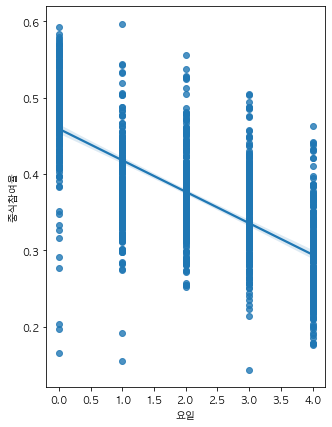

In [7]:
plt.figure(figsize = (5, 7))
sns.regplot(data = train, x = '요일', y = '중식참여율')

## 2) ['요일'], ['석식참여율']
- -0.252 : 약한 음의 상관관계

<AxesSubplot:xlabel='요일', ylabel='석식참여율'>

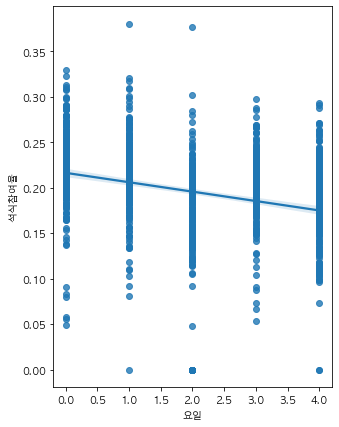

In [8]:
plt.figure(figsize = (5, 7))
sns.regplot(data = train, x = '요일', y = '석식참여율')

# 7. 상관관계 분석 - ['휴일전날']

## 1) ['휴일전날'], ['석식참여율']
- -0.150 : 약한 음의 상관관계

<AxesSubplot:xlabel='휴일전날', ylabel='석식참여율'>

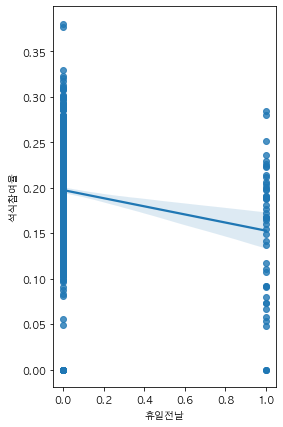

In [9]:
plt.figure(figsize = (4, 7))
sns.regplot(data = train, x = '휴일전날', y = '석식참여율')

# 8. 상관관계 분석 - ['코로나신규확진자']

## 1) 2020-02-28 ~ 2021-01-26
- 경상남도 진주시 첫 신규 확진자 발생 일자 2020-02-28
- ['중식참여율'] 0.245 : 약한 양의 상관관계
- ['석식참여율'] -0.056 : 상관관계 없음

In [10]:
train_corona1 = train.loc[995:]

<AxesSubplot:xlabel='코로나신규확진자', ylabel='중식참여율'>

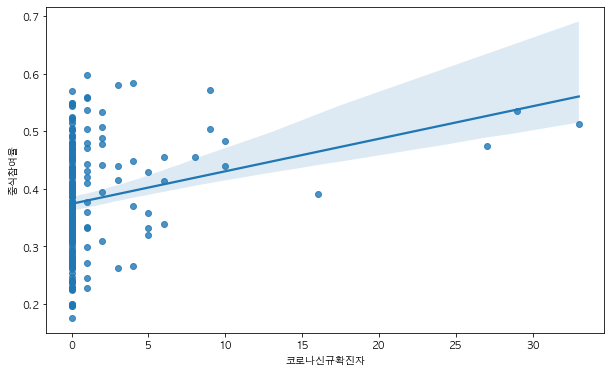

In [11]:
plt.figure(figsize = (10, 6))
sns.regplot(data = train_corona1, x = '코로나신규확진자', y = '중식참여율')

## 2) 2020-11-19 ~ 2021-01-26
- 경상남도 진주시 코로나 신규 확진자가 급격히 증가하는 일자 2020-11-19
- ['중식참여율'] 0.063 : 상관관계 없음
- ['석식참여율'] -0.213 : 약한 음의 상관관계

In [12]:
train_corona2 = train.loc[1162:]

<AxesSubplot:xlabel='코로나신규확진자', ylabel='석식참여율'>

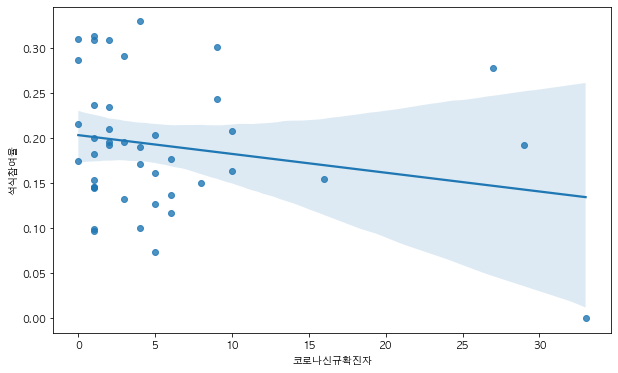

In [13]:
plt.figure(figsize = (10, 6))
sns.regplot(data = train_corona2, x = '코로나신규확진자', y = '석식참여율')

# 9. 상관관계 분석 - ['거리두기단계']

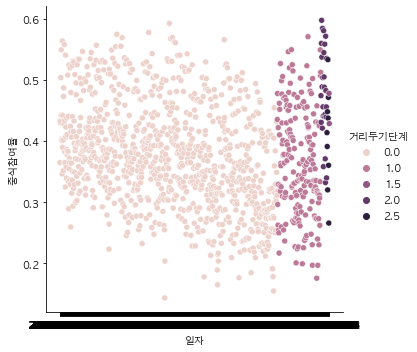

In [14]:
sns.relplot(data = train, x = '일자', y = '중식참여율', hue = '거리두기단계')

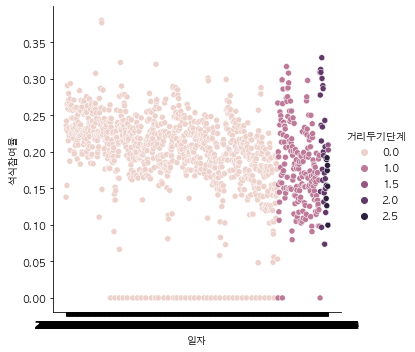

In [15]:
sns.relplot(data = train, x = '일자', y = '석식참여율', hue = '거리두기단계')

# 10. 상관관계 분석 - 날씨 데이터

## 1) 우천 - ['우산(중식)'], ['우산(석식)']
- 대부분 7, 8, 9월에 집중

<AxesSubplot:xlabel='월', ylabel='우산(중식)'>

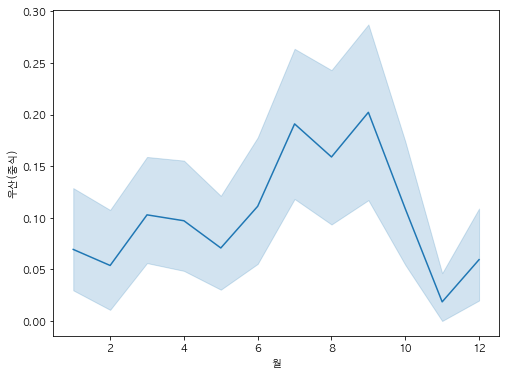

In [16]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = train, x = '월', y = '우산(중식)')

<AxesSubplot:xlabel='월', ylabel='우산(석식)'>

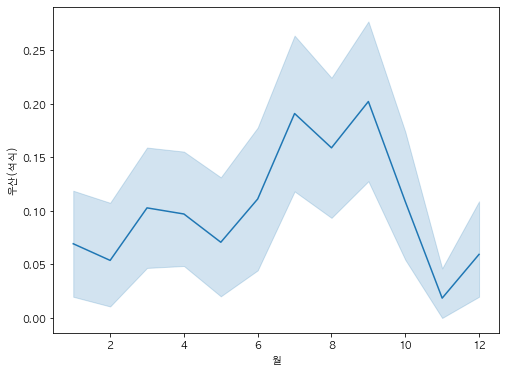

In [17]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = train, x = '월', y = '우산(석식)')

## 2) 불쾌지수 - ['불쾌지수(중식)'], ['불쾌지수(석식)']
- 불쾌지수가 75이상이면 50% 이상의 사람들이 불쾌감을 느낌
- 우천 시와 마찬가지로 불쾌지수가 75이상인 일자는 7, 8, 9월에 집중

<AxesSubplot:xlabel='월', ylabel='불쾌지수(중식)'>

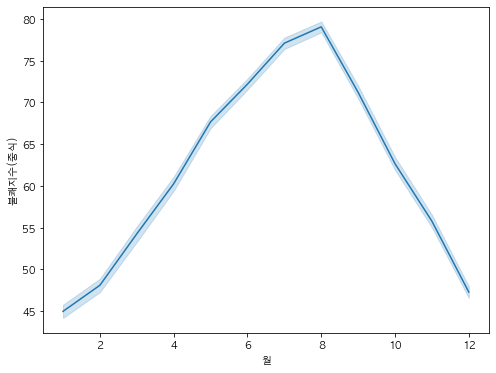

In [18]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = train, x = '월', y = '불쾌지수(중식)')

<AxesSubplot:xlabel='월', ylabel='불쾌지수(석식)'>

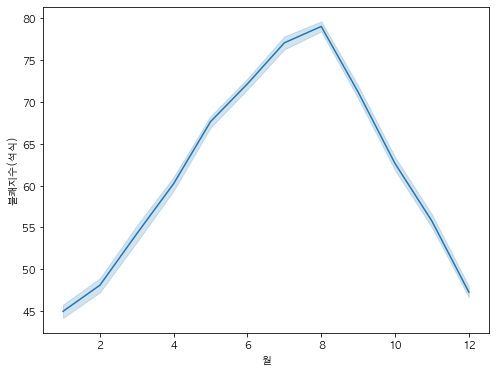

In [19]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = train, x = '월', y = '불쾌지수(석식)')

In [20]:
hot_month = [7, 8, 9]
train_hot = train.query('월 in @hot_month')

## 3) 상관계수 비교 - 7, 8, 9월
- ['우산(중식)'] -0.023 : 상관관계 없음
- ['우산(석식)'] -0.049 : 상관관계 없음
- ['불쾌지수(중식)'] -0.038 : 상관관계 없음
- ['불쾌지수(석식)'] 0.092 : 상관관계 없음

## 4) 갈수기
- 갈수기 (2, 3, 4, 5월) 에 비가 온다면?
- ['우산(중식)'] 0.127 : 약한 양의 상관관계
- ['우산(석식)'] 0.019 : 상관관계 없음

In [21]:
thirst_month = [2, 3, 4, 5]
train_thirst = train.query('월 in @thirst_month')

<AxesSubplot:xlabel='우산(중식)', ylabel='중식참여율'>

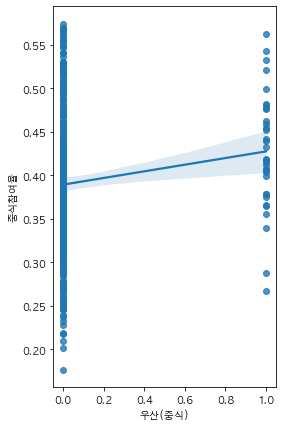

In [22]:
plt.figure(figsize = (4, 7))
sns.regplot(data = train_thirst, x = '우산(중식)', y = '중식참여율')

## 5) 체감온도
- 12, 1, 2월은 혹한기

<AxesSubplot:xlabel='월', ylabel='체감온도(중식)'>

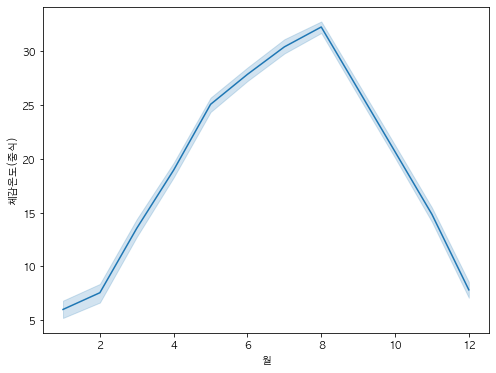

In [23]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = train, x = '월', y = '체감온도(중식)')

<AxesSubplot:xlabel='월', ylabel='체감온도(석식)'>

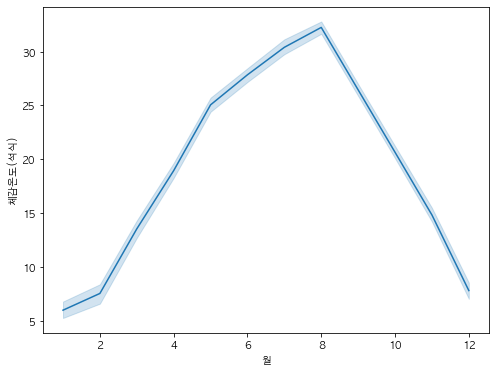

In [24]:
plt.figure(figsize = (8, 6))
sns.lineplot(data = train, x = '월', y = '체감온도(석식)')

In [25]:
cold_month = [12, 1, 2]
train_cold = train.query('월 in @cold_month')

## 6) 상관계수 비교 - 12, 1, 2월
- ['체감온도(중식)'] : -0.081 상관관계 없음
- ['체감온도(석식)'] : -0.014 상관관계 없음